#### Activation Hill function
*Gene 1 product induces the expression of gene 2* \
\
$\frac{\ dG_1}{\ dt} = k_1 - \gamma_1 G_1$ \
\
$\frac{\ dG_2}{\ dt} = [\frac{\ G_1^n}{\ c^n + G_1^n}]k_2 - \gamma_2 G_2$\
\
**where**, \
$\frac{\ dG_1}{\ dt}$ - rate of change gene 1 product \
$\frac{\ dG_2}{\ dt}$ - rate of change gene 2 product \
$k_1$ - rate of synthesis of protein 1 \
$k_2$ - rate of synthesis of protein 2 \
$\gamma_1$ - rate of degradation of protein 1 \
$\gamma_2$ - rate of degradation of protein 2 \
$G1$ - concentration of protein 1 \
$G2$ - concentration of protein 2 \
$c$ - activation coefficient \
$n$ - Hill coefficient

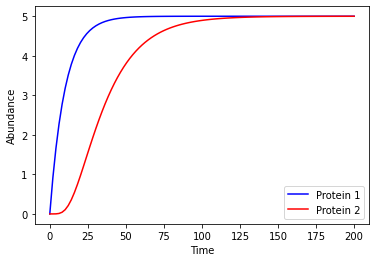

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

y0 = [0,0] #0 protein1, protein2

t = np.linspace(0,200,num=100)

k_1 = 0.5
gamma_1 = 0.1
k_2 = 0.5
gamma_2 = 0.05
n = 5
c = 5


par = [k_1, gamma_1, k_2, gamma_2, n, c] # parameters for ODE solver

def sim(vars, t, par):
    G1 = vars[0]
    G2 = vars[1]

    k_1 = par[0]
    gamma_1 = par[1]
    k_2 = par[2]
    gamma_2 = par[3]
    n = par[4]
    c = par[5]

    dG1dt = k_1 - gamma_1*G1
    dG2dt = k_2*(G1**n/(c**n + G1**n)) - gamma_2*G2

    return ([dG1dt, dG2dt])

y = odeint(sim, y0, t, args = (par,))

f,graph = plt.subplots(1)

g1, = graph.plot(t, y[:, 0], 'b', label="Protein 1")
g2, = graph.plot(t, y[:, 1], 'r', label="Protein 2")

graph.set_xlabel('Time')
graph.set_ylabel('Abundance')

graph.legend(handles=[g1,g2])

plt.show()